In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt

Isp = 282 #specific impulse
mr = 420000 #rocket mass without fuel
rE = 6371000 # earth radius
a = 400000 #altitude
G = 6.67408e-11#grav constant
ME = 5.972e24 #earth mass
w = 7.29210e-5 #earth angular velocity
g0 = 9.8 #acceleration due to gravity

In [2]:
def fuel(lat):
    #radial velocity, vr
    vr = np.sqrt((G*ME)/(rE + a))
    print(vr)
    #tangential velocity, vt
    vt = rE*w*np.cos(np.radians(lat))
    print(vt)
    fraction = (vr - vt)/(Isp*g0)
    print(fraction)
    return mr*(np.exp(fraction)-1)

Test first if function `fuel` works

In [3]:
lat_sample = 14 #deg

fuel(lat_sample)

7672.36396094
450.779688692
2.6131076394


5309378.5634483974

Then, clean your function and proceed to plotting.

In [11]:
def fuel(lat):
    #radial velocity, vr
    vr = np.sqrt((G*ME)/(rE + a))
    #tangential velocity, vt
    vt = rE*w*np.cos(np.radians(lat))
    fraction = (vr - vt)/(Isp*g0)
    return mr*(np.exp(fraction)-1)

In [20]:
ph_lat = 7.5225 #Zamboanga Sibugay
capcav_lat = 28.474 #Cape Canaveral
Puntalobos_lat = -12.5 #Punta Lobos
Plesetsk_lat = 62.9279
Overberg_lat = -34.6027
Tanegashima_lat = 30.39
Wenchang_lat = 19.614492
StasiunPeluncuran_lat=-7.6466
Puerto_Belgrano=-38.9

#considering choosing fewer locations; too crowded
locs = [capcav_lat, Puntalobos_lat, Plesetsk_lat, Overberg_lat, Tanegashima_lat, Wenchang_lat, StasiunPeluncuran_lat, Puerto_Belgrano]
labels = ['capcav', 'Puntalobos', 'Plesetsk', 'Overberg', 'Tanegashima', 'Wenchang', 'Stasiun Peluncuran', 'Puerto Belgrano']

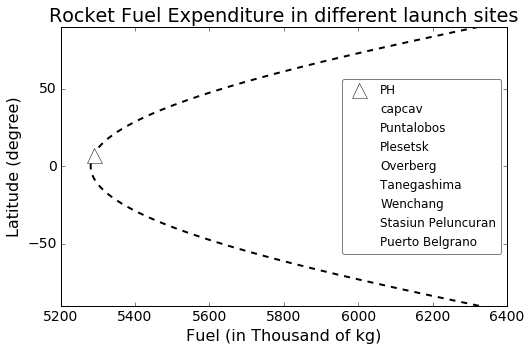

In [24]:
import numpy as np
import matplotlib.pyplot as plt

#change global settings for fontsize
matplotlib.rcParams.update({'font.size': 16})
import matplotlib
#make ticks font size smaller than set above
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)

#set colormap of data points since there's duplicate; choose here: 
#http://matplotlib.org/examples/color/colormaps_reference.html
plt.set_cmap('jet') 

#start plotting
lat = np.arange(-90,91,1)

fig, ax = plt.subplots(figsize=(8,5))
#plot all
ax.plot(fuel(lat)/1e3, lat, 'k--', lw=2)
#plot pH
ax.plot(fuel(ph_lat)/1e3, ph_lat, 'w^', ms=15, label='PH')

#plot launch site locations
for i, j in zip(locs, labels):
    plt.plot(fuel(i)/1e3, i, 'o', label=j, ms=15,  alpha=0.6)
ax.set_ylabel('Latitude (degree)')
ax.set_xlabel('Fuel (in Thousand of kg)')
ax.set_title('Rocket Fuel Expenditure in different launch sites')
ax.set_ylim([-90,90])

# add the legend in the middle of the plot
leg = plt.legend(fancybox=True, loc='best', numpoints=1, fontsize=12)
# set the alpha value of the legend: it will be translucent
leg.get_frame().set_alpha(0.5)

#show plot
plt.show()